## Import

In [1]:
# Import internal modules
import os.path
from typing import List, Set, Dict, TypedDict, Tuple, Optional

# Import 3rd party modules
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Dataset

In [79]:
df = pd.read_csv("assets/data/data_audio_f_mean.csv")
df.head()

noise_db machine_type  model_id         sound  \
0        -6          fan         0  00000000.wav   
1        -6          fan         0  00000001.wav   
2        -6          fan         0  00000002.wav   
3        -6          fan         0  00000003.wav   
4        -6          fan         0  00000004.wav   

                                          sound_path    target  spectogram  \
0  assets\sounds\-6_db_fan\id_00\abnormal\0000000...  abnormal    0.095985   
1  assets\sounds\-6_db_fan\id_00\abnormal\0000000...  abnormal    0.083133   
2  assets\sounds\-6_db_fan\id_00\abnormal\0000000...  abnormal    0.120339   
3  assets\sounds\-6_db_fan\id_00\abnormal\0000000...  abnormal    0.095124   
4  assets\sounds\-6_db_fan\id_00\abnormal\0000000...  abnormal    0.132093   

   mel_spectogram  chromagram  chromagram_cq  chromagram_cens      mfcc  \
0        0.032898    0.598389       0.335931         0.251026 -4.151321   
1        0.034875    0.549378       0.386137         0.243251 -4.259758   
2        0.027383    0.776584       0.321334         0.255388 -3.331495   
3        0.046161    0.757323       0.373222         0.246073 -3.485691   
4        0.023357    0.862880       0.295585         0.250950 -3.539014   

        rms  spectral_centroid  spectral_bandwidth  spectral_contrast  \
0  0.007211        1391.829492         1770.435764          23.832949   
1  0.007428        1127.738463         1574.488895          24.478842   
2  0.006812        1804.463937         1813.068302          22.781830   
3  0.008451         893.927245         1230.738677          21.108826   
4  0.006496        2297.372342         1980.079305          22.923389   

   spectral_flatness  roll_off_frequency   tonnetz  zero_crossing_rate  
0           0.000225         5660.559507  0.065789            0.053984  
1           0.000103         5120.156046  0.024099            0.043520  
2           0.000449         5696.131759  0.076063            0.084253  
3           0.000061         3657.546948  0.044300            0.029228  
4           0.000795         6358.914758  0.077573            0.116914

## Main statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54057 entries, 0 to 54056
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   noise_db            54057 non-null  int64  
 1   machine_type        54057 non-null  object 
 2   model_id            54057 non-null  int64  
 3   sound               54057 non-null  object 
 4   sound_path          54057 non-null  object 
 5   target              54057 non-null  object 
 6   spectogram          54057 non-null  float64
 7   mel_spectogram      54057 non-null  float64
 8   chromagram          54057 non-null  float64
 9   chromagram_cq       54057 non-null  float64
 10  chromagram_cens     54057 non-null  float64
 11  mfcc                54057 non-null  float64
 12  rms                 54057 non-null  float64
 13  spectral_centroid   54057 non-null  float64
 14  spectral_bandwidth  54057 non-null  float64
 15  spectral_contrast   54057 non-null  float64
 16  spec

In [5]:
df.describe().T

count         mean         std          min  \
noise_db            54057.0     0.000000    4.899025    -6.000000   
model_id            54057.0     2.822687    2.262704     0.000000   
spectogram          54057.0     0.063059    0.025227     0.011692   
mel_spectogram      54057.0     0.011604    0.008728     0.000214   
chromagram          54057.0     0.692511    0.115256     0.290711   
chromagram_cq       54057.0     0.600544    0.093031     0.200155   
chromagram_cens     54057.0     0.272767    0.009592     0.177543   
mfcc                54057.0    -5.983121    1.294356   -10.664822   
rms                 54057.0     0.004028    0.001574     0.000564   
spectral_centroid   54057.0  1453.012630  355.777005   483.779455   
spectral_bandwidth  54057.0  1647.391507  209.826442   907.249328   
spectral_contrast   54057.0    22.351036    1.109247    20.011189   
spectral_flatness   54057.0     0.000447    0.000325     0.000011   
roll_off_frequency  54057.0  5201.327046  757.453816  2021.648023   
tonnetz             54057.0    -0.007604    0.020214    -0.104417   
zero_crossing_rate  54057.0     0.071301    0.030079     0.008582   

                            25%          50%          75%          max  
noise_db              -6.000000     0.000000     6.000000     6.000000  
model_id               0.000000     2.000000     4.000000     6.000000  
spectogram             0.043109     0.058028     0.083207     0.180340  
mel_spectogram         0.005015     0.007992     0.020057     0.097718  
chromagram             0.599524     0.732653     0.789849     0.881168  
chromagram_cq          0.557246     0.620909     0.665356     0.777581  
chromagram_cens        0.271032     0.275126     0.278180     0.286754  
mfcc                  -6.938166    -5.918948    -5.080822    -2.680073  
rms                    0.002863     0.003591     0.005676     0.010241  
spectral_centroid   1202.818443  1420.091527  1652.662821  3317.615405  
spectral_bandwidth  1502.069907  1657.969235  1792.715745  2362.255614  
spectral_contrast     21.465583    22.107501    23.209192    26.781867  
spectral_flatness      0.000221     0.000358     0.000586     0.004953  
roll_off_frequency  4650.197635  5279.756550  5801.074898  7025.819542  
tonnetz               -0.017202    -0.006728     0.002416     0.148165  
zero_crossing_rate     0.051160     0.065958     0.083437     0.292820

In [8]:
# Any missing values?
df.isnull().any()

noise_db              False
machine_type          False
model_id              False
sound                 False
sound_path            False
target                False
spectogram            False
mel_spectogram        False
chromagram            False
chromagram_cq         False
chromagram_cens       False
mfcc                  False
rms                   False
spectral_centroid     False
spectral_bandwidth    False
spectral_contrast     False
spectral_flatness     False
roll_off_frequency    False
tonnetz               False
zero_crossing_rate    False
dtype: bool

In [11]:
# Any duplicates?
df.duplicated().any()

False

In [12]:
# Correlation matrix
df.corr().style.background_gradient(cmap="coolwarm")

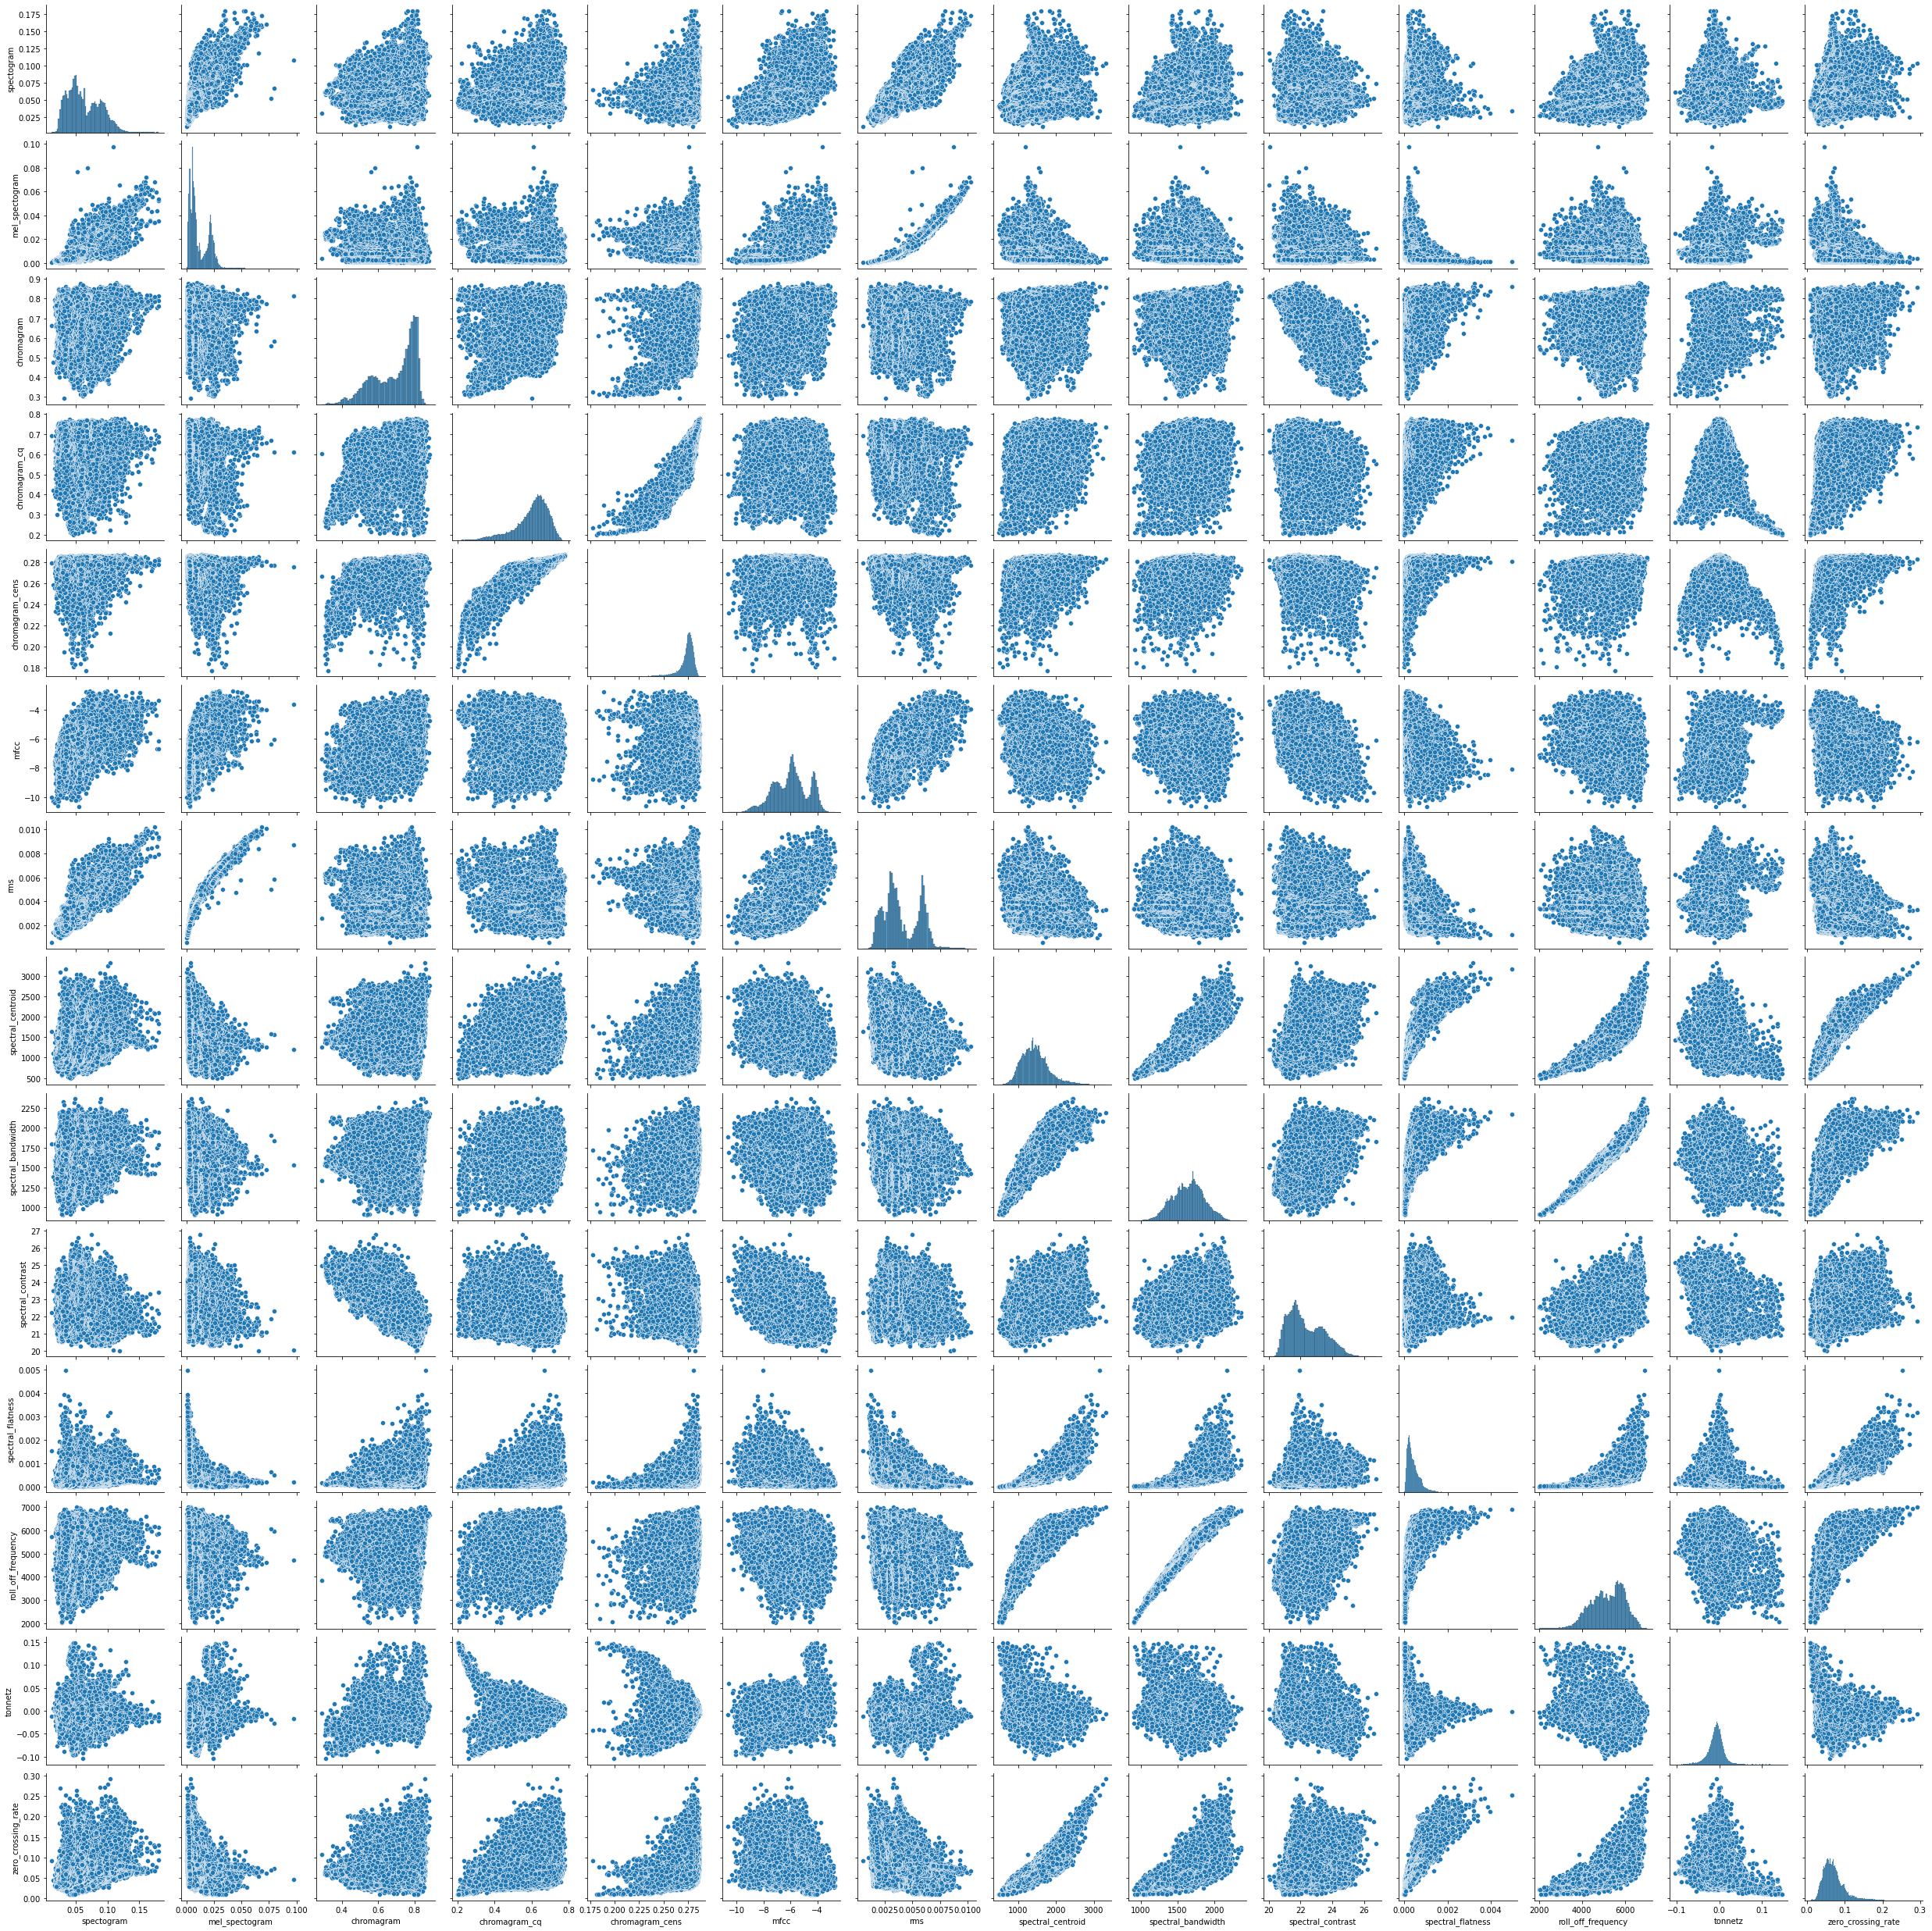

In [23]:
# Scatter plots to visualize correlations
## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

## Plot
sns.pairplot(df[cols])

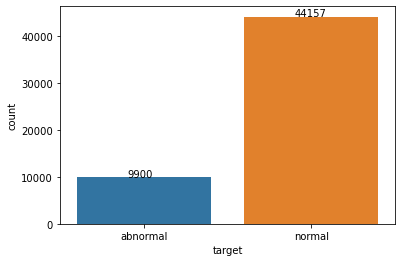

In [36]:
# Count number of normal and abnormal sounds
ax = sns.countplot(x=df.target, data=df)

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 100))

### Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)

#### All machine types

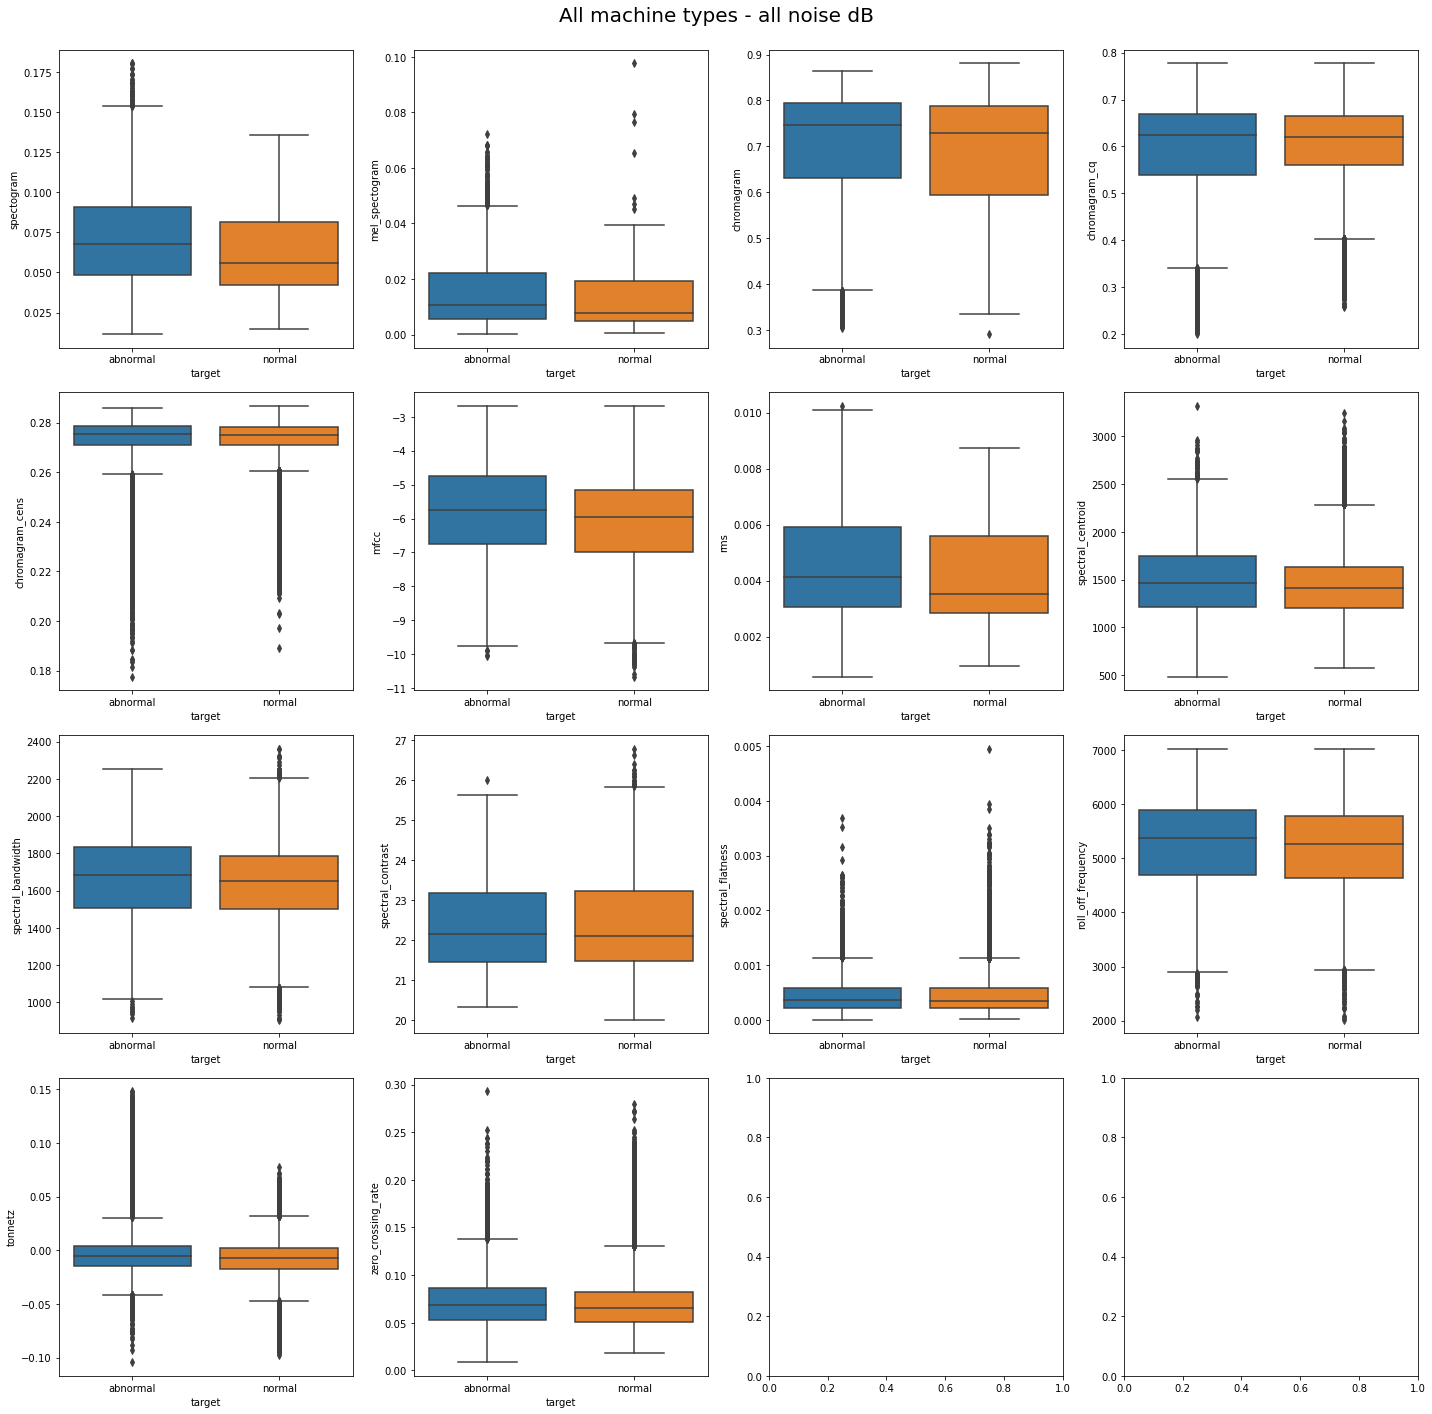

In [121]:
## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df, ax=ax[i//4,i - 4*(i//4)])

fig.suptitle('All machine types - all noise dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

#### Per machine type

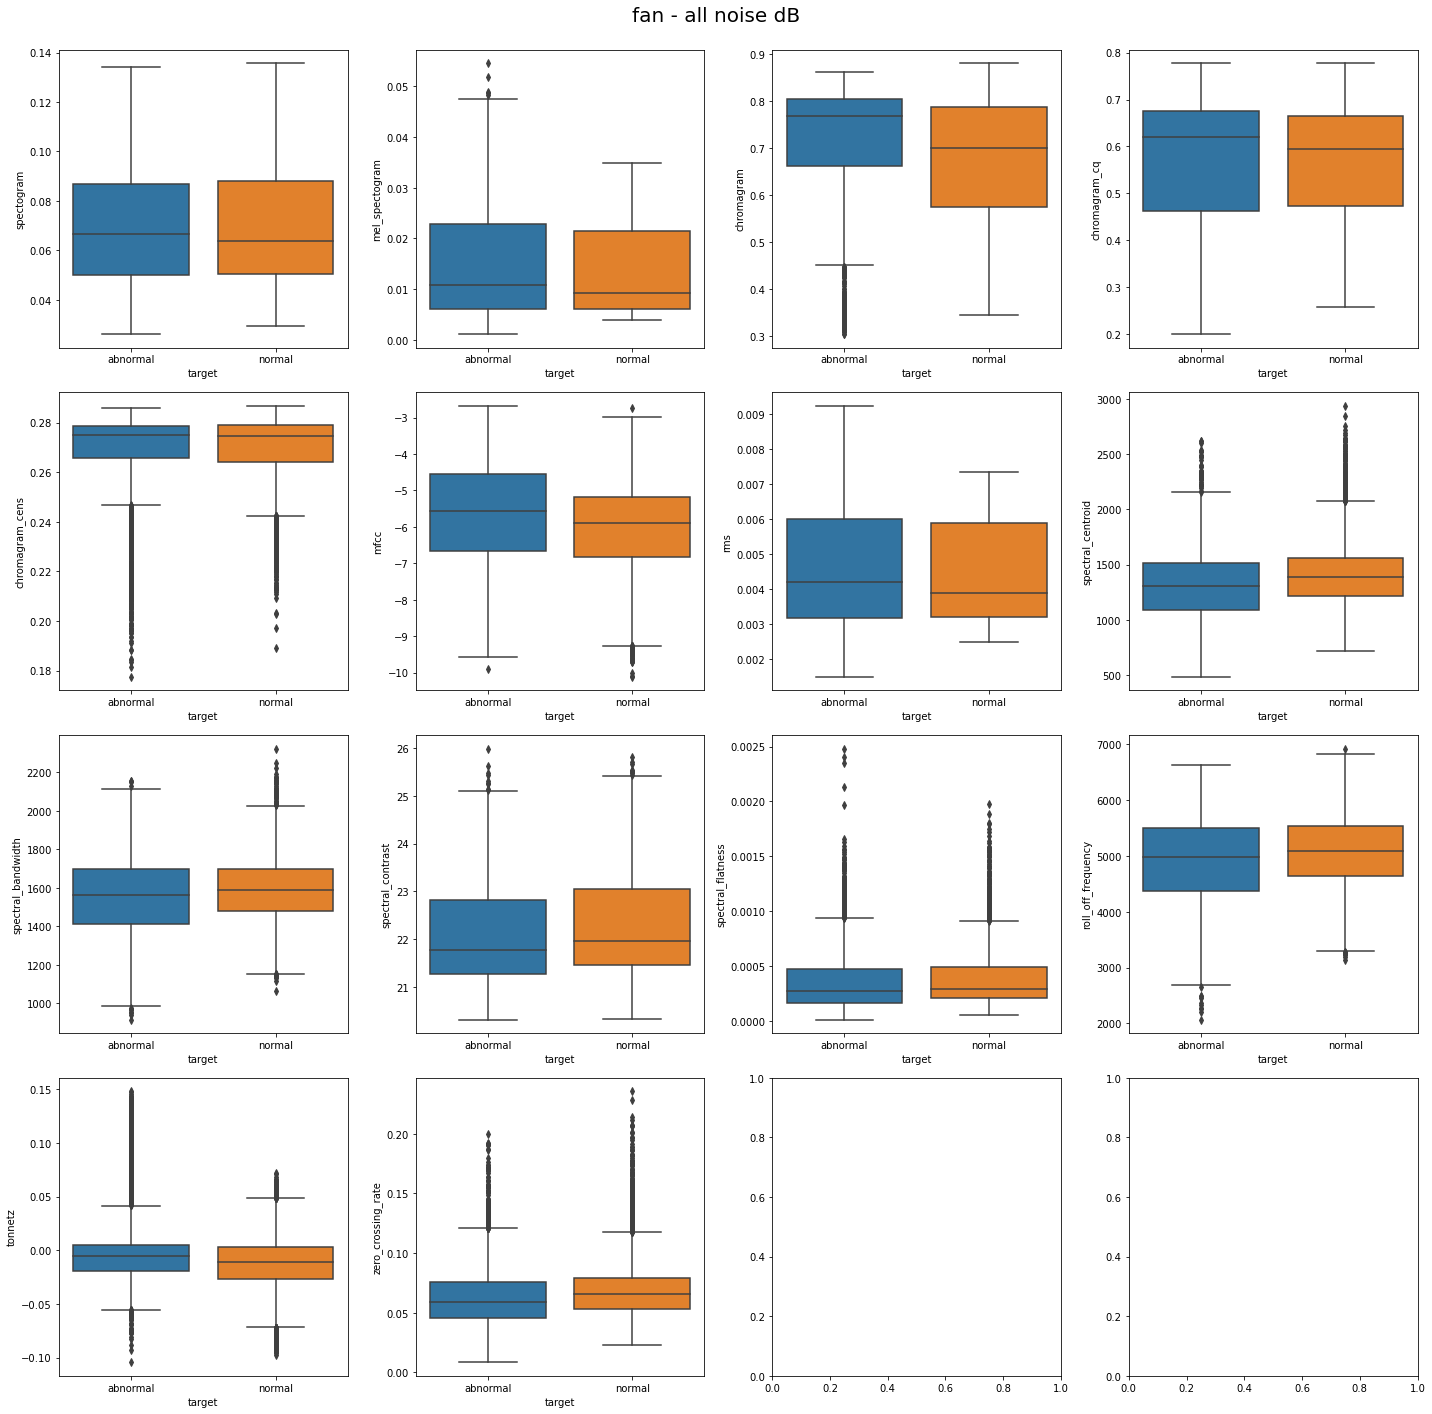

In [127]:
## Variable
machine_type = "fan"

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[df.machine_type == machine_type], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - all noise dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

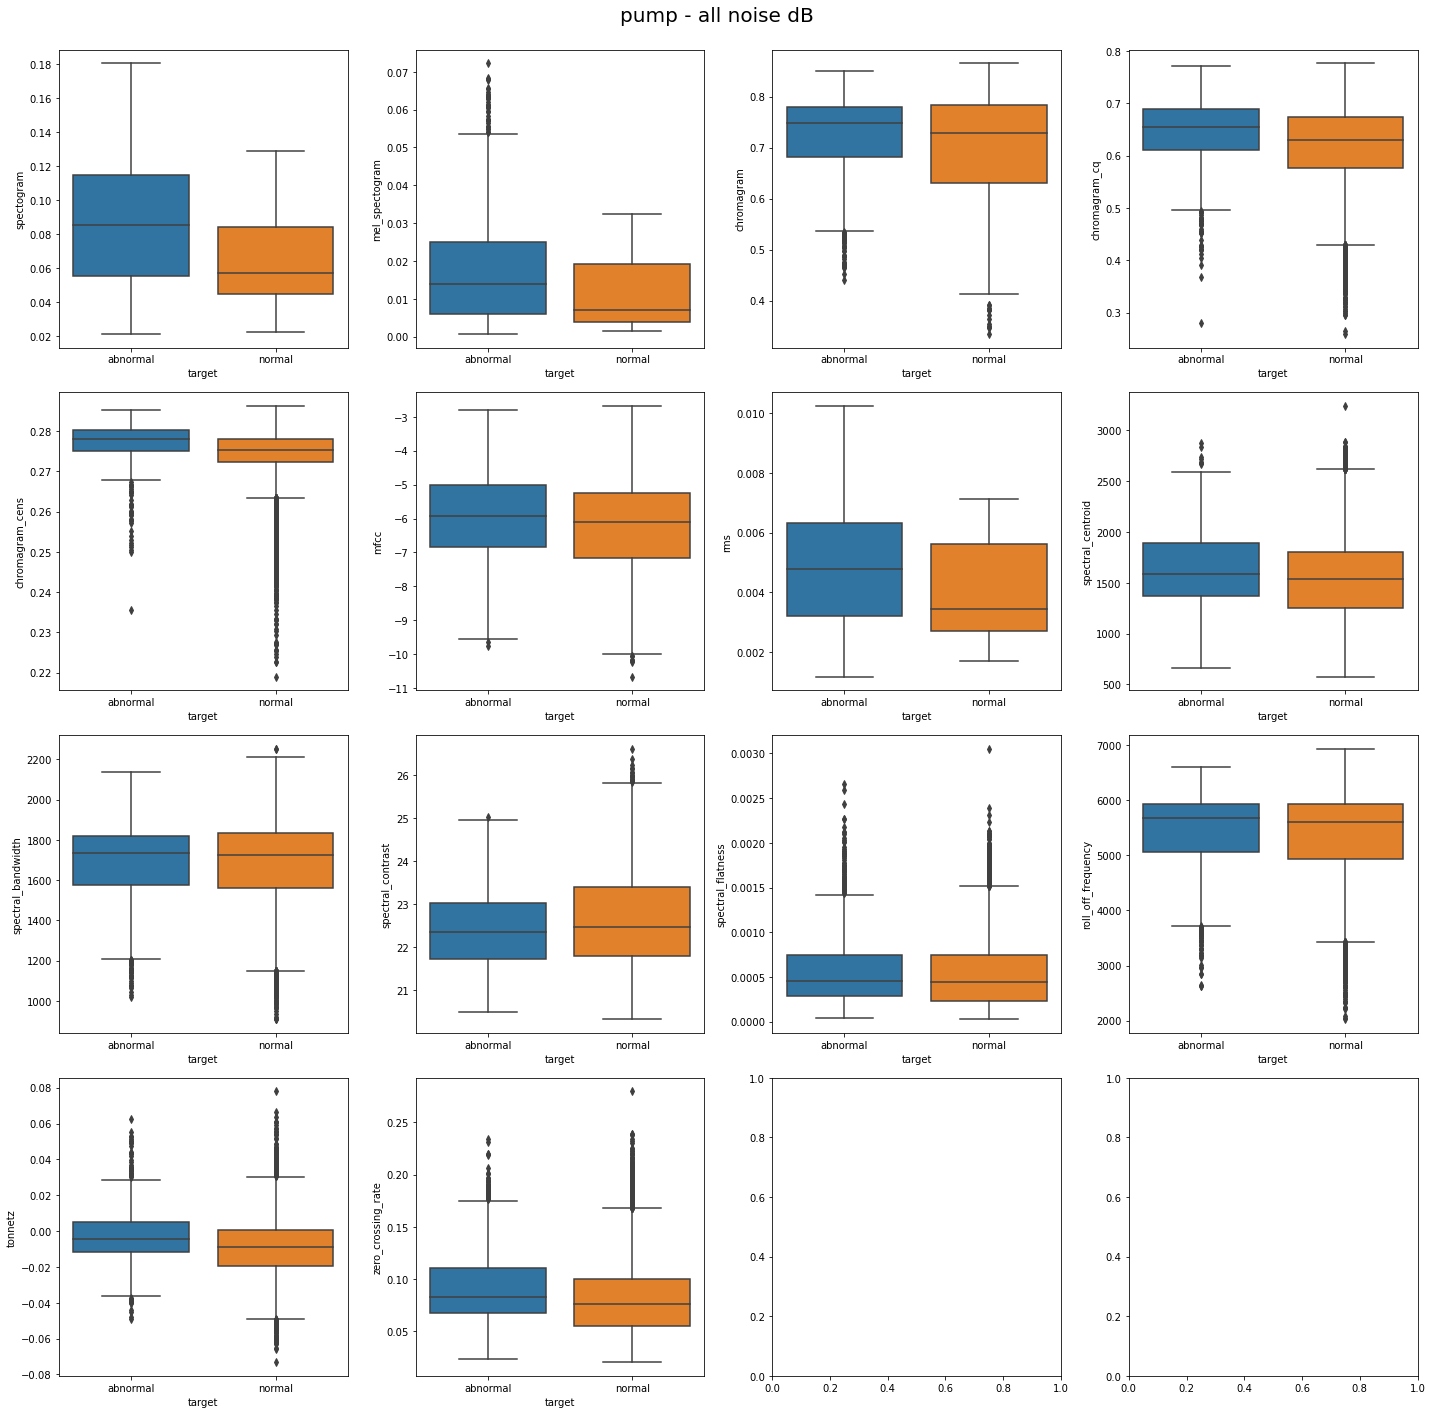

In [126]:
## Variable
machine_type = "pump"

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[df.machine_type == machine_type], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - all noise dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

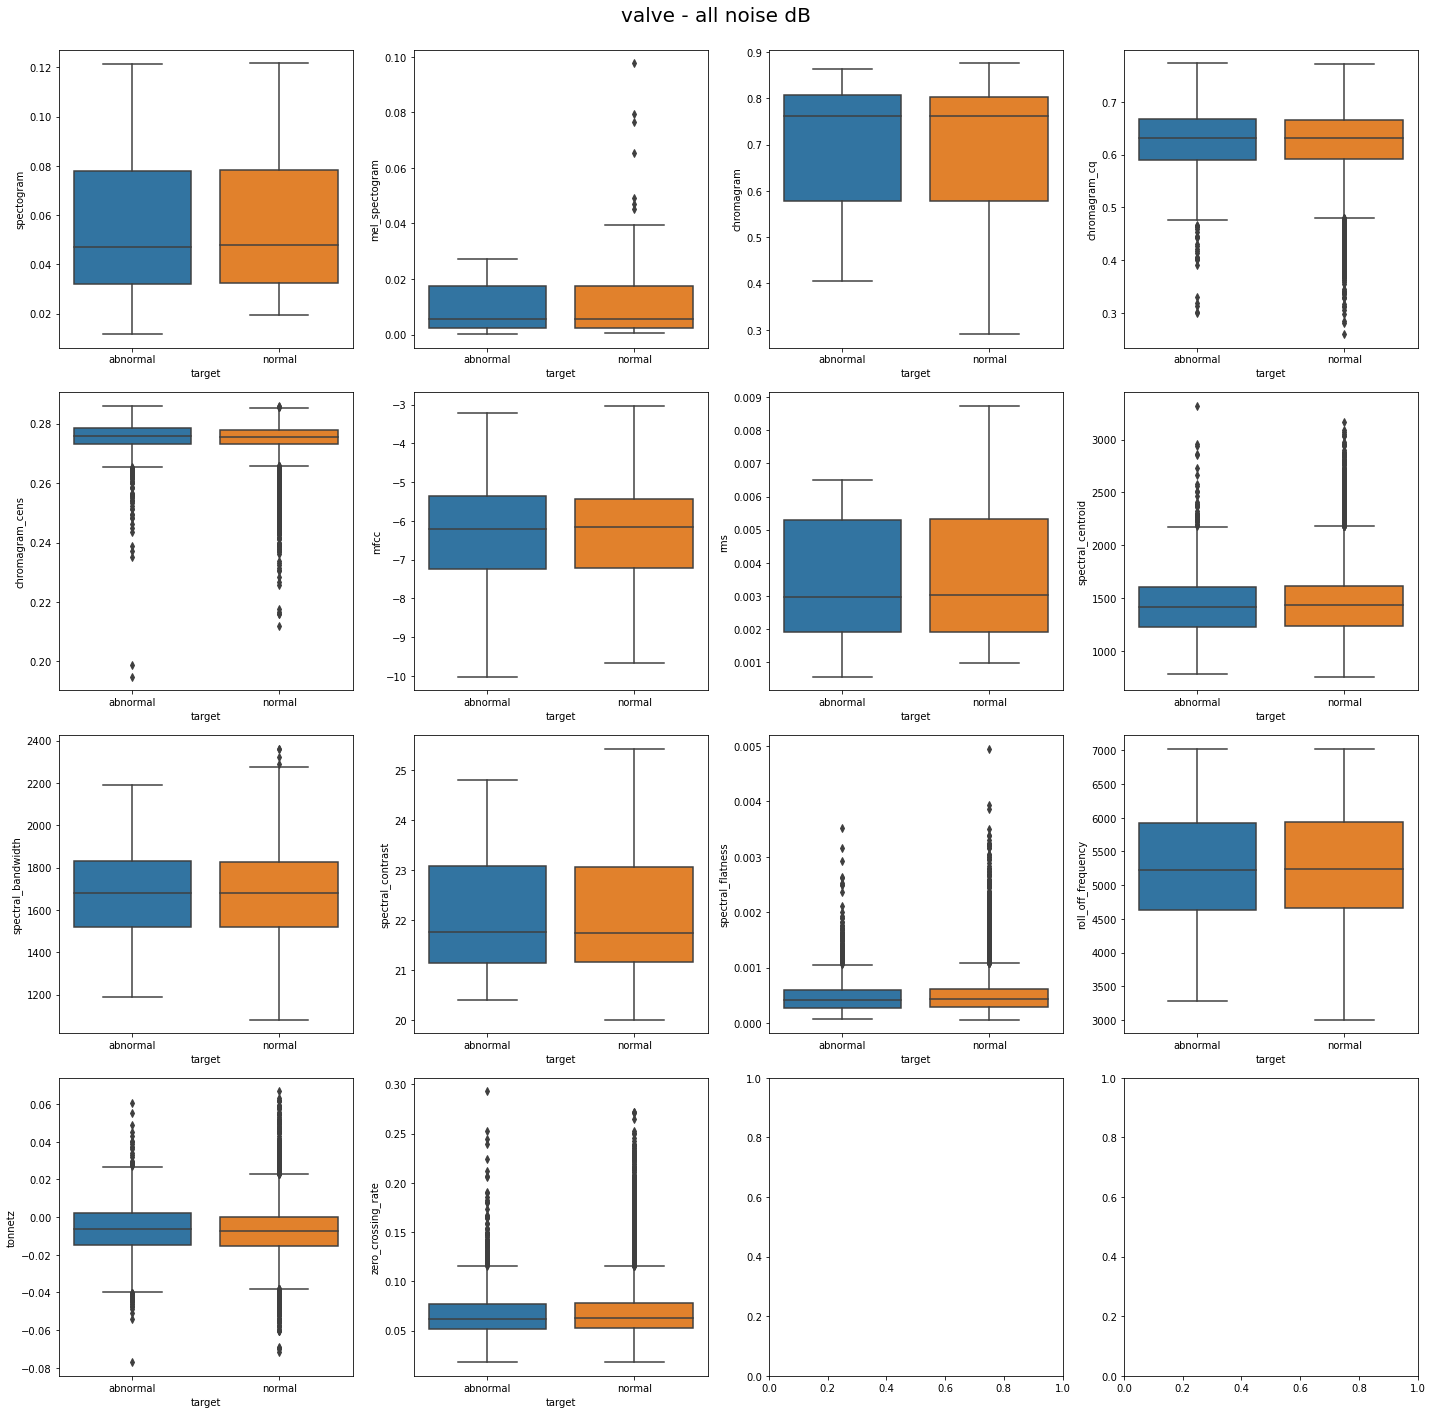

In [128]:
## Variable
machine_type = "valve"

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[df.machine_type == machine_type], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - all noise dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

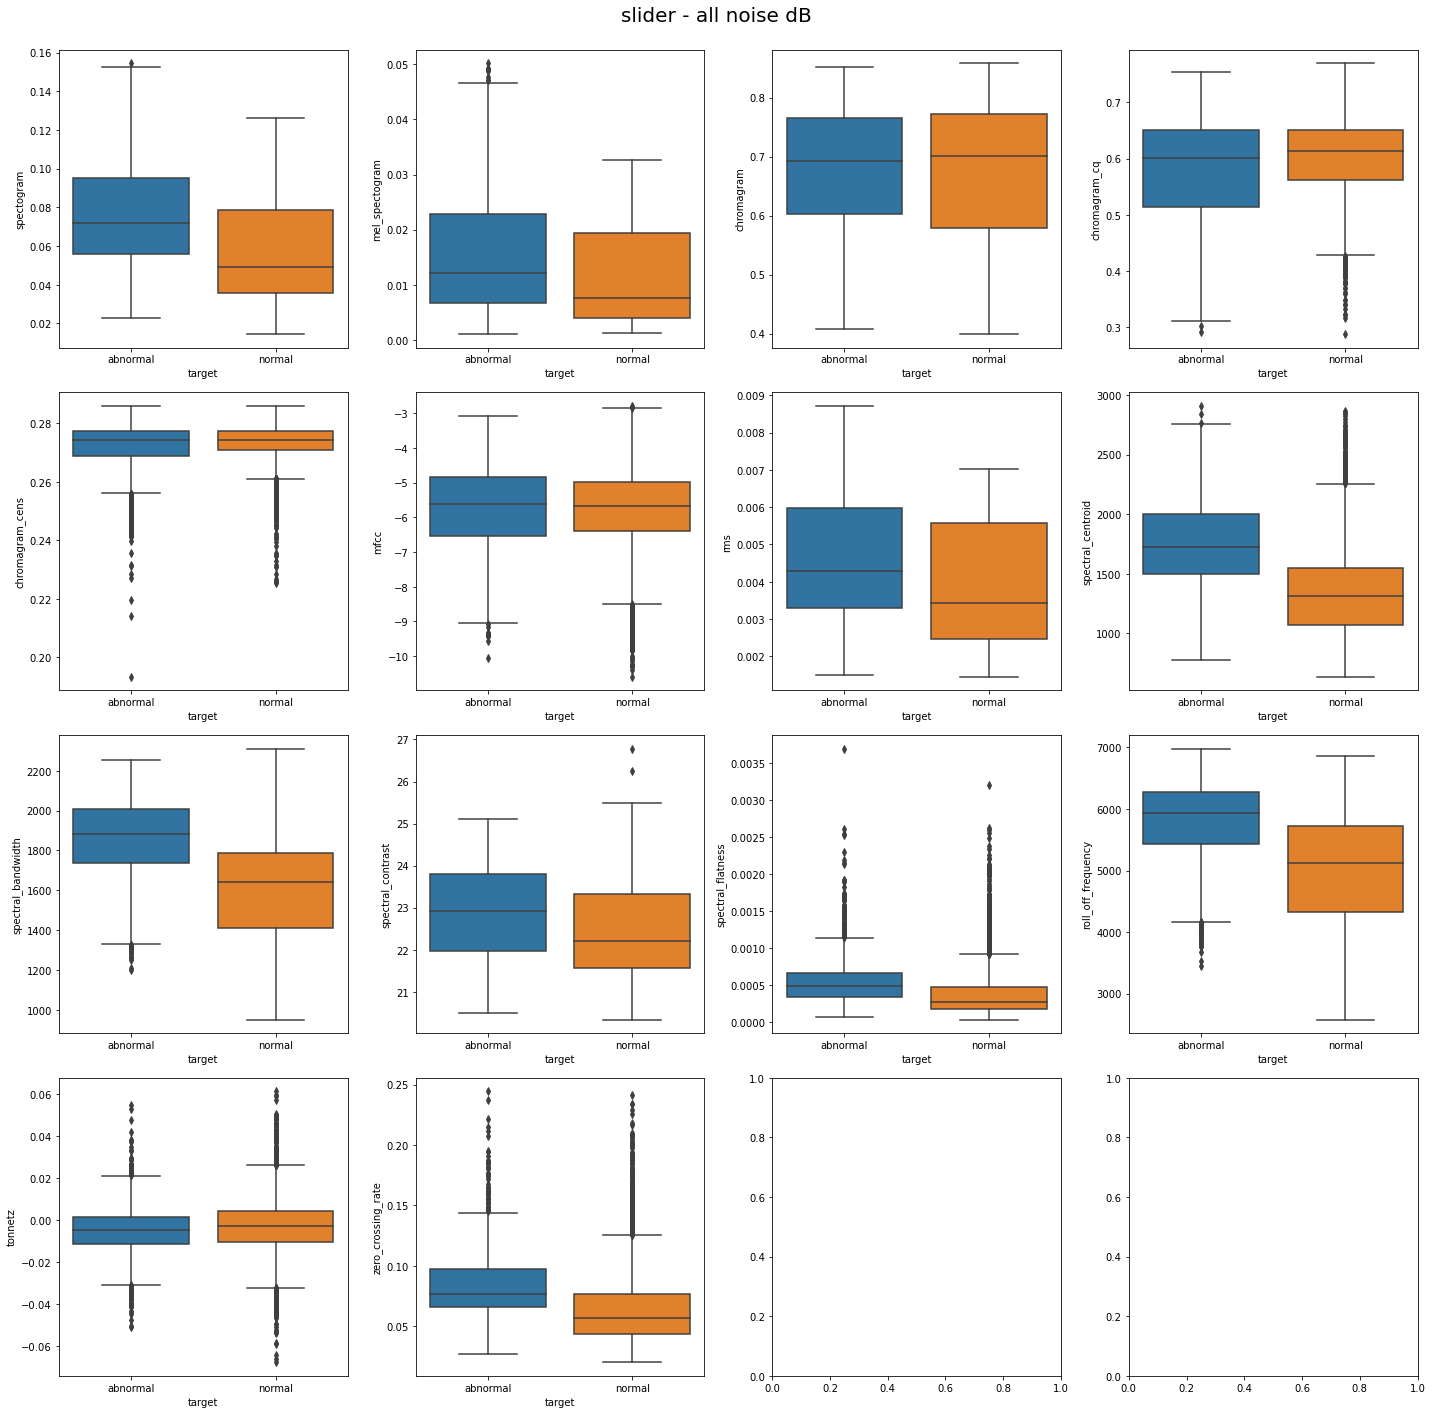

In [125]:
## Variable
machine_type = "slider"

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[df.machine_type == machine_type], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - all noise dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

#### Per machine type and background noise -6 dB

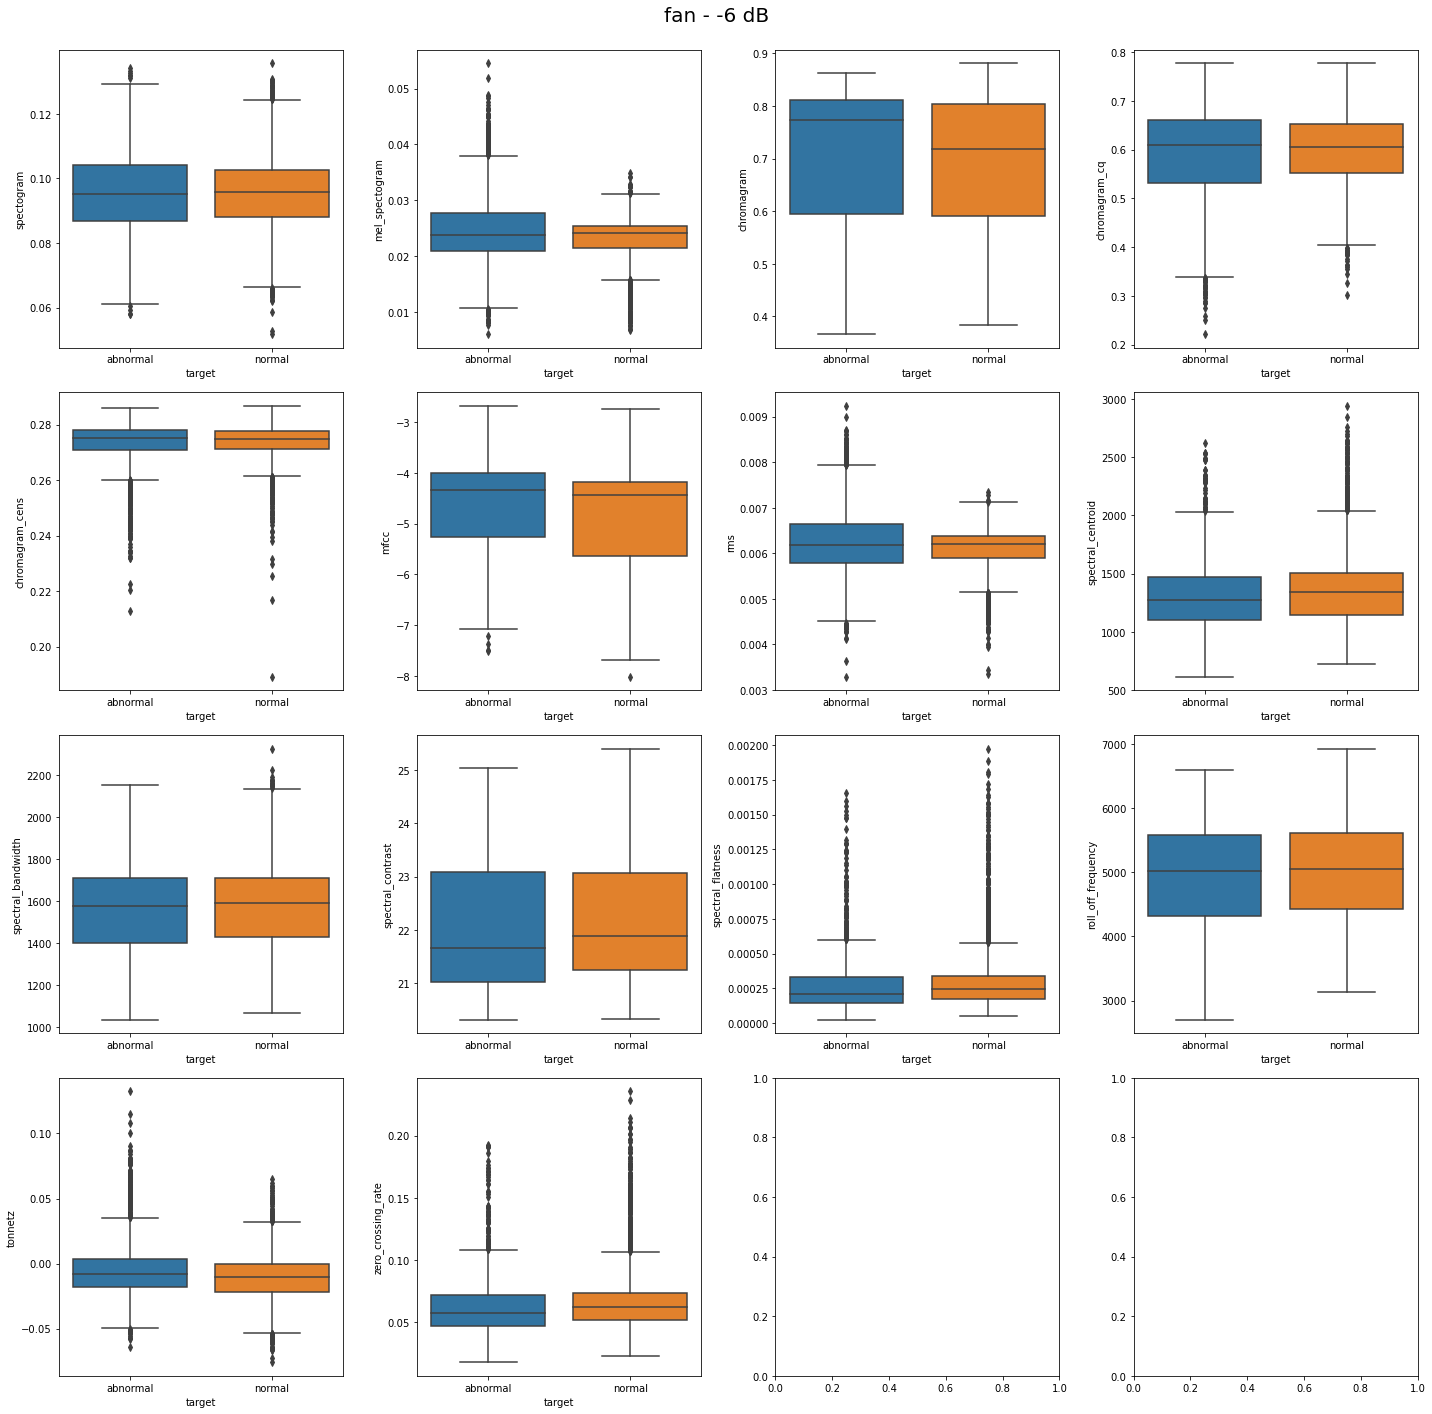

In [129]:
## Variable
machine_type = "fan"
noise = -6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

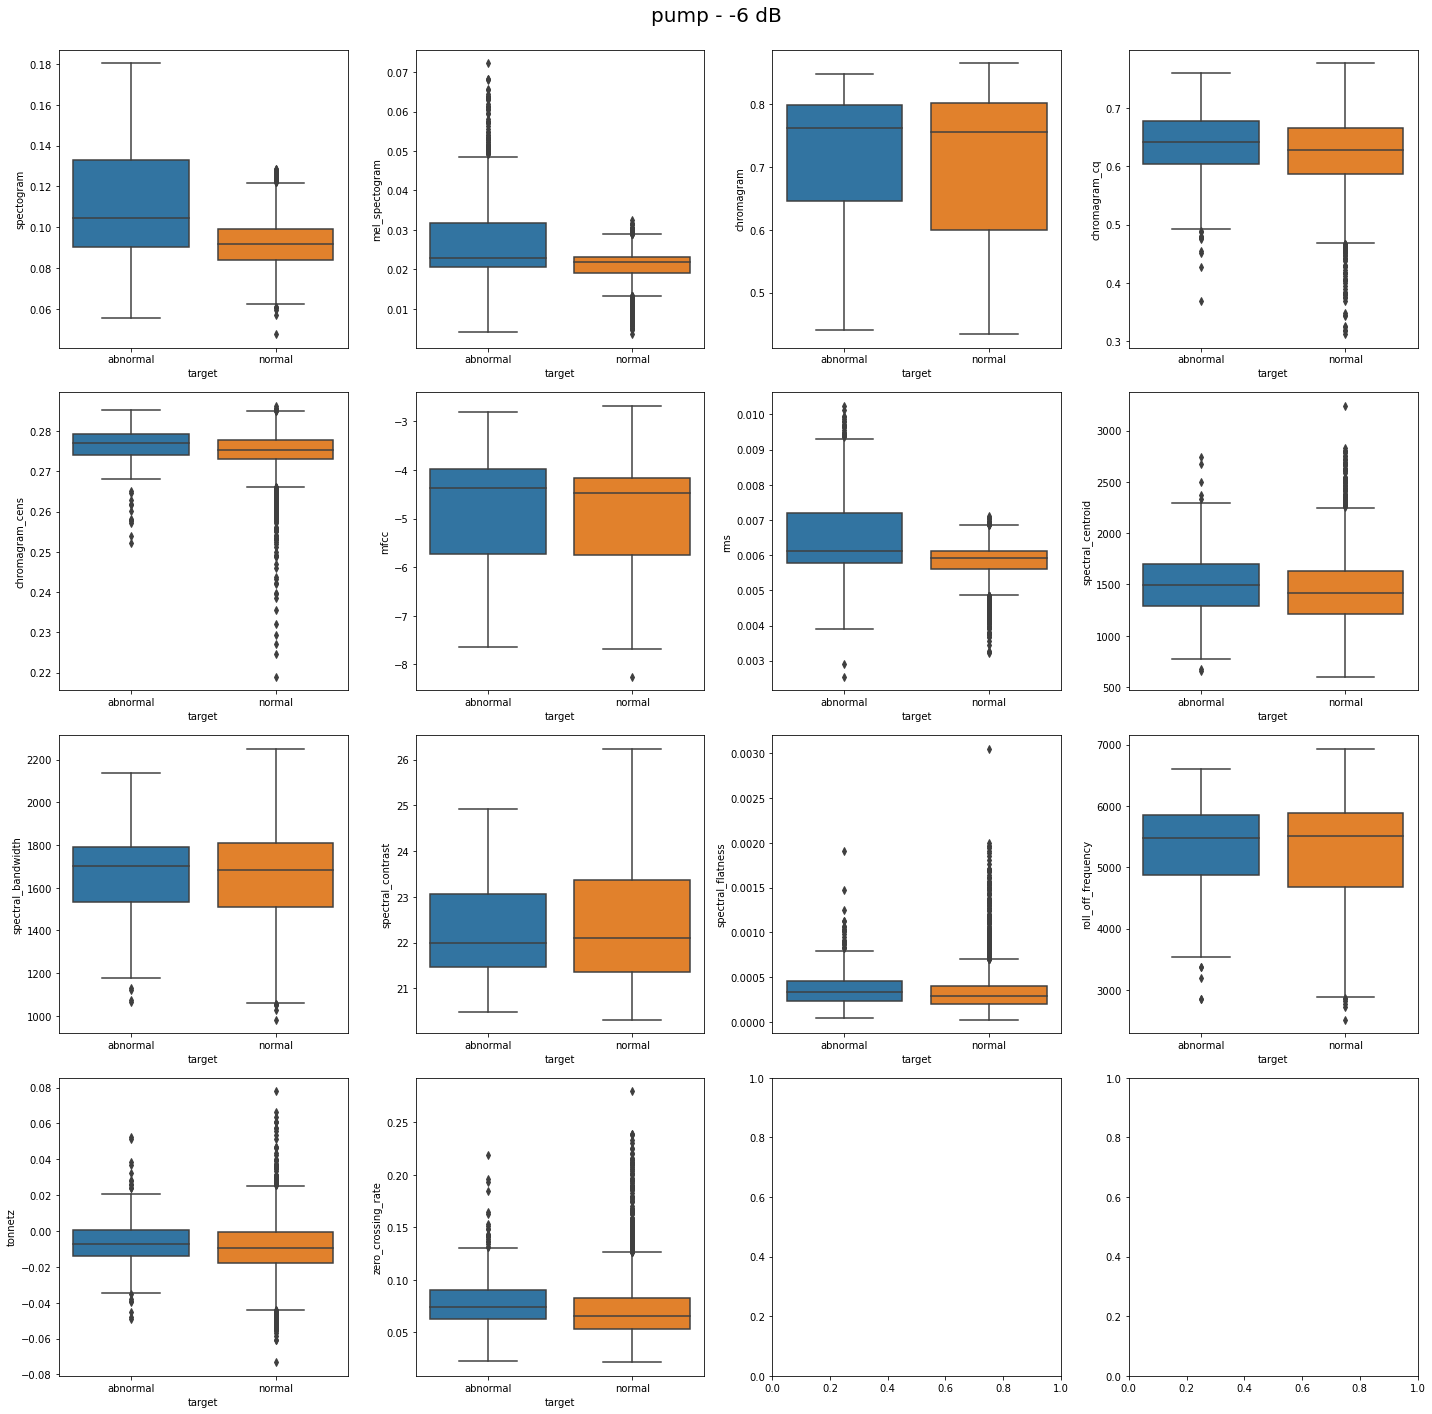

In [130]:
## Variable
machine_type = "pump"
noise = -6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

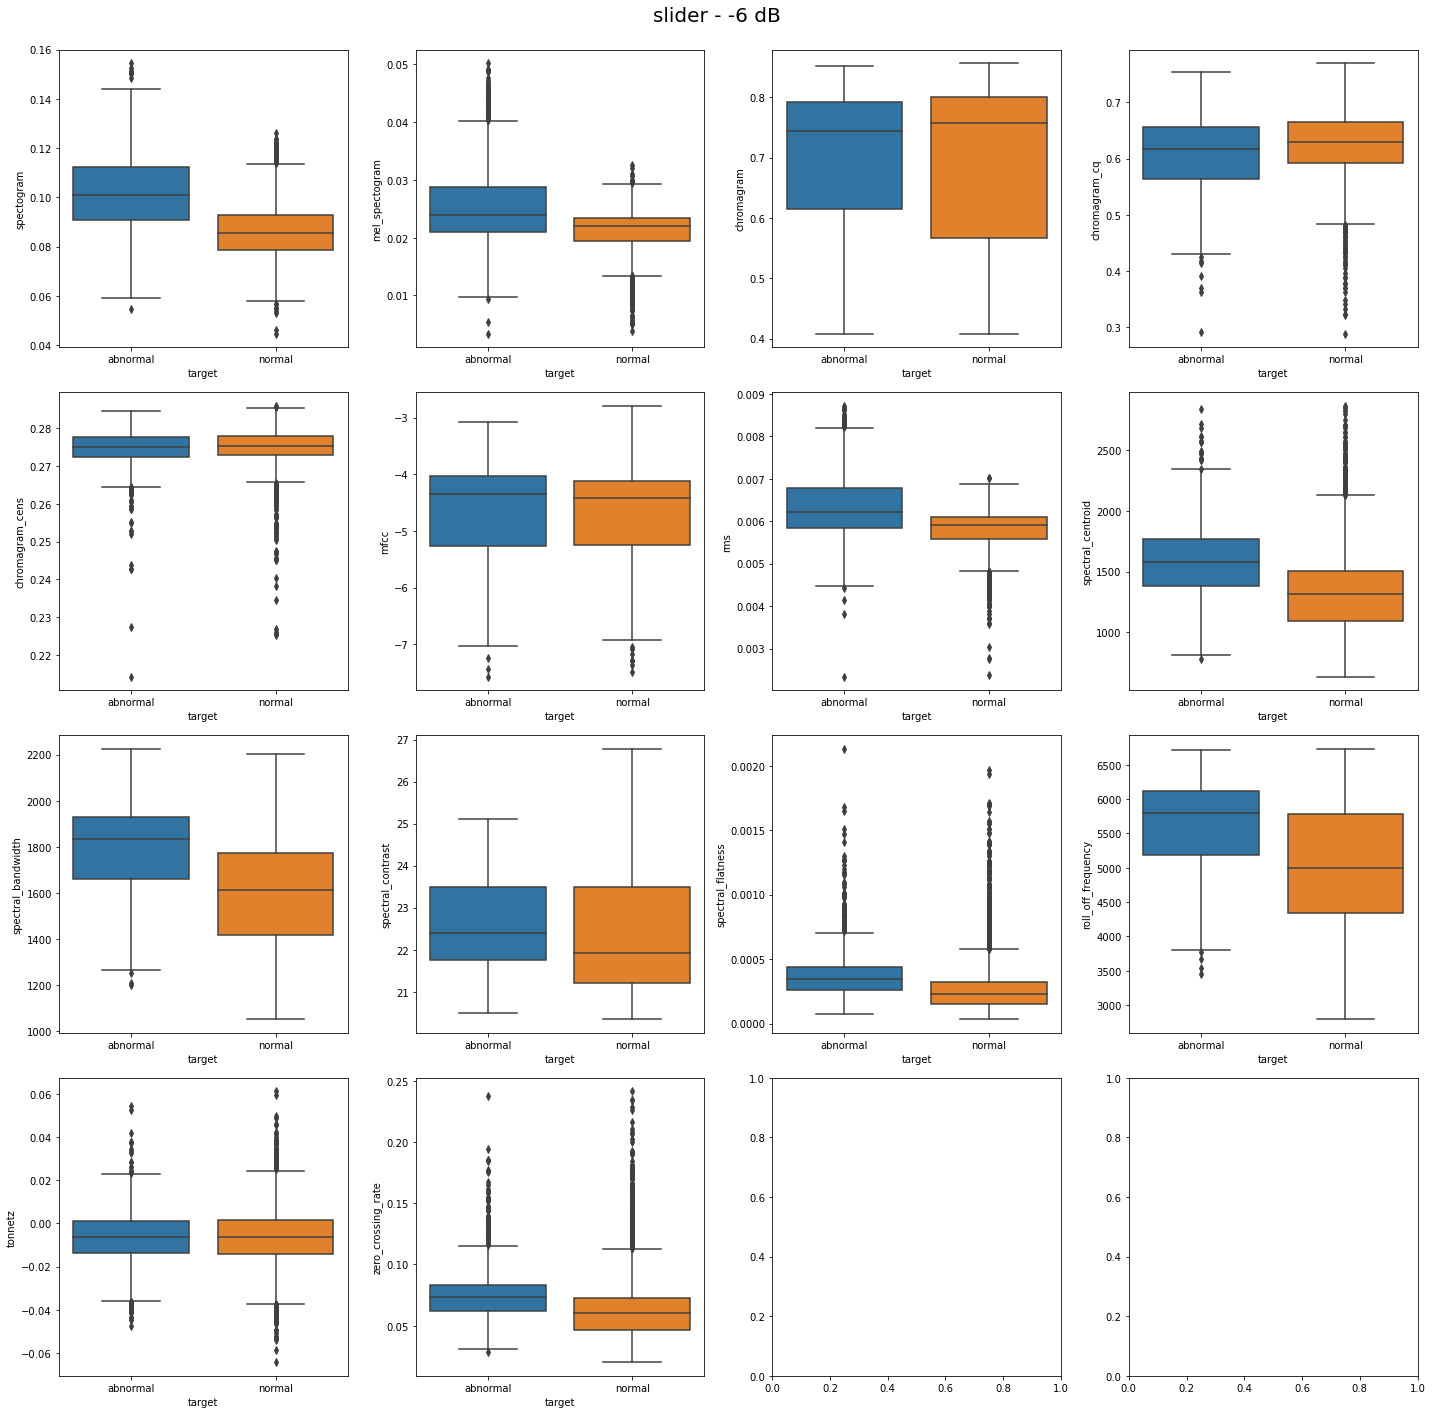

In [131]:
## Variable
machine_type = "slider"
noise = -6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

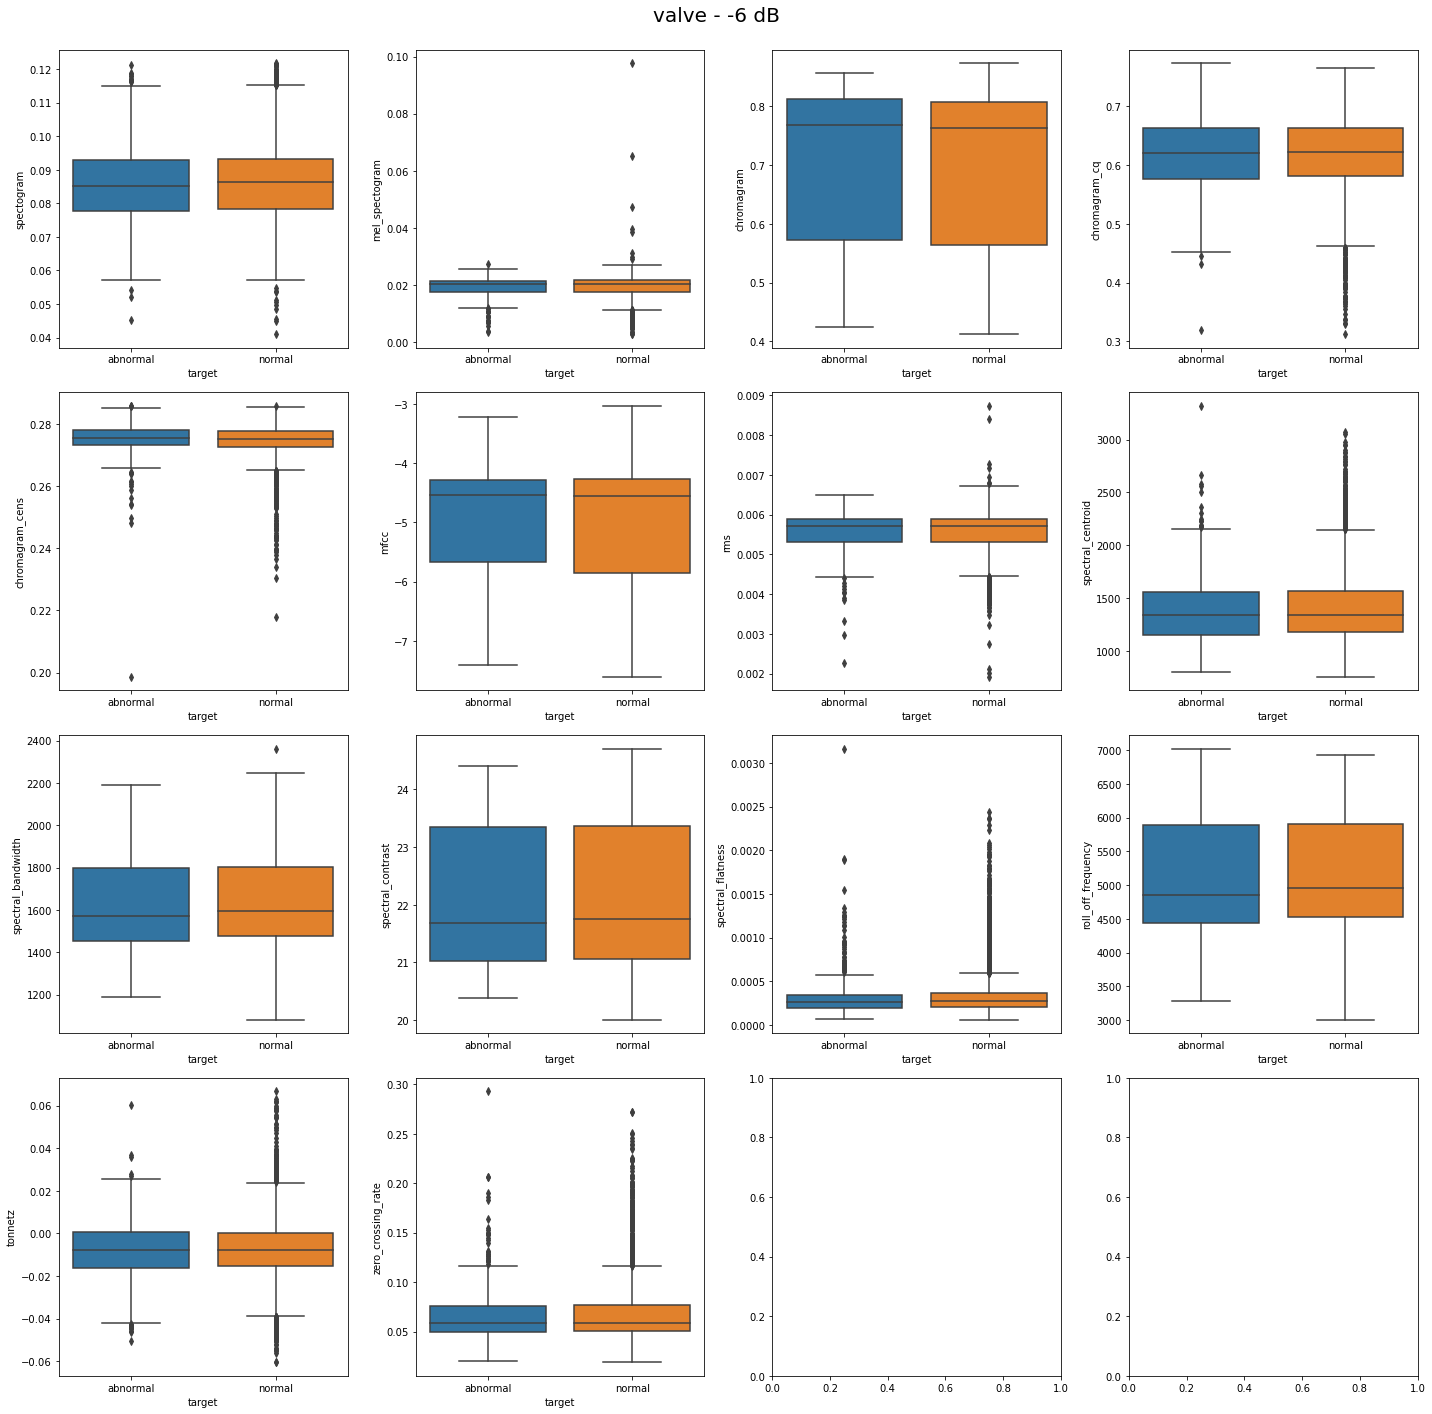

In [132]:
## Variable
machine_type = "valve"
noise = -6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

#### Per machine type and background noise 6 dB

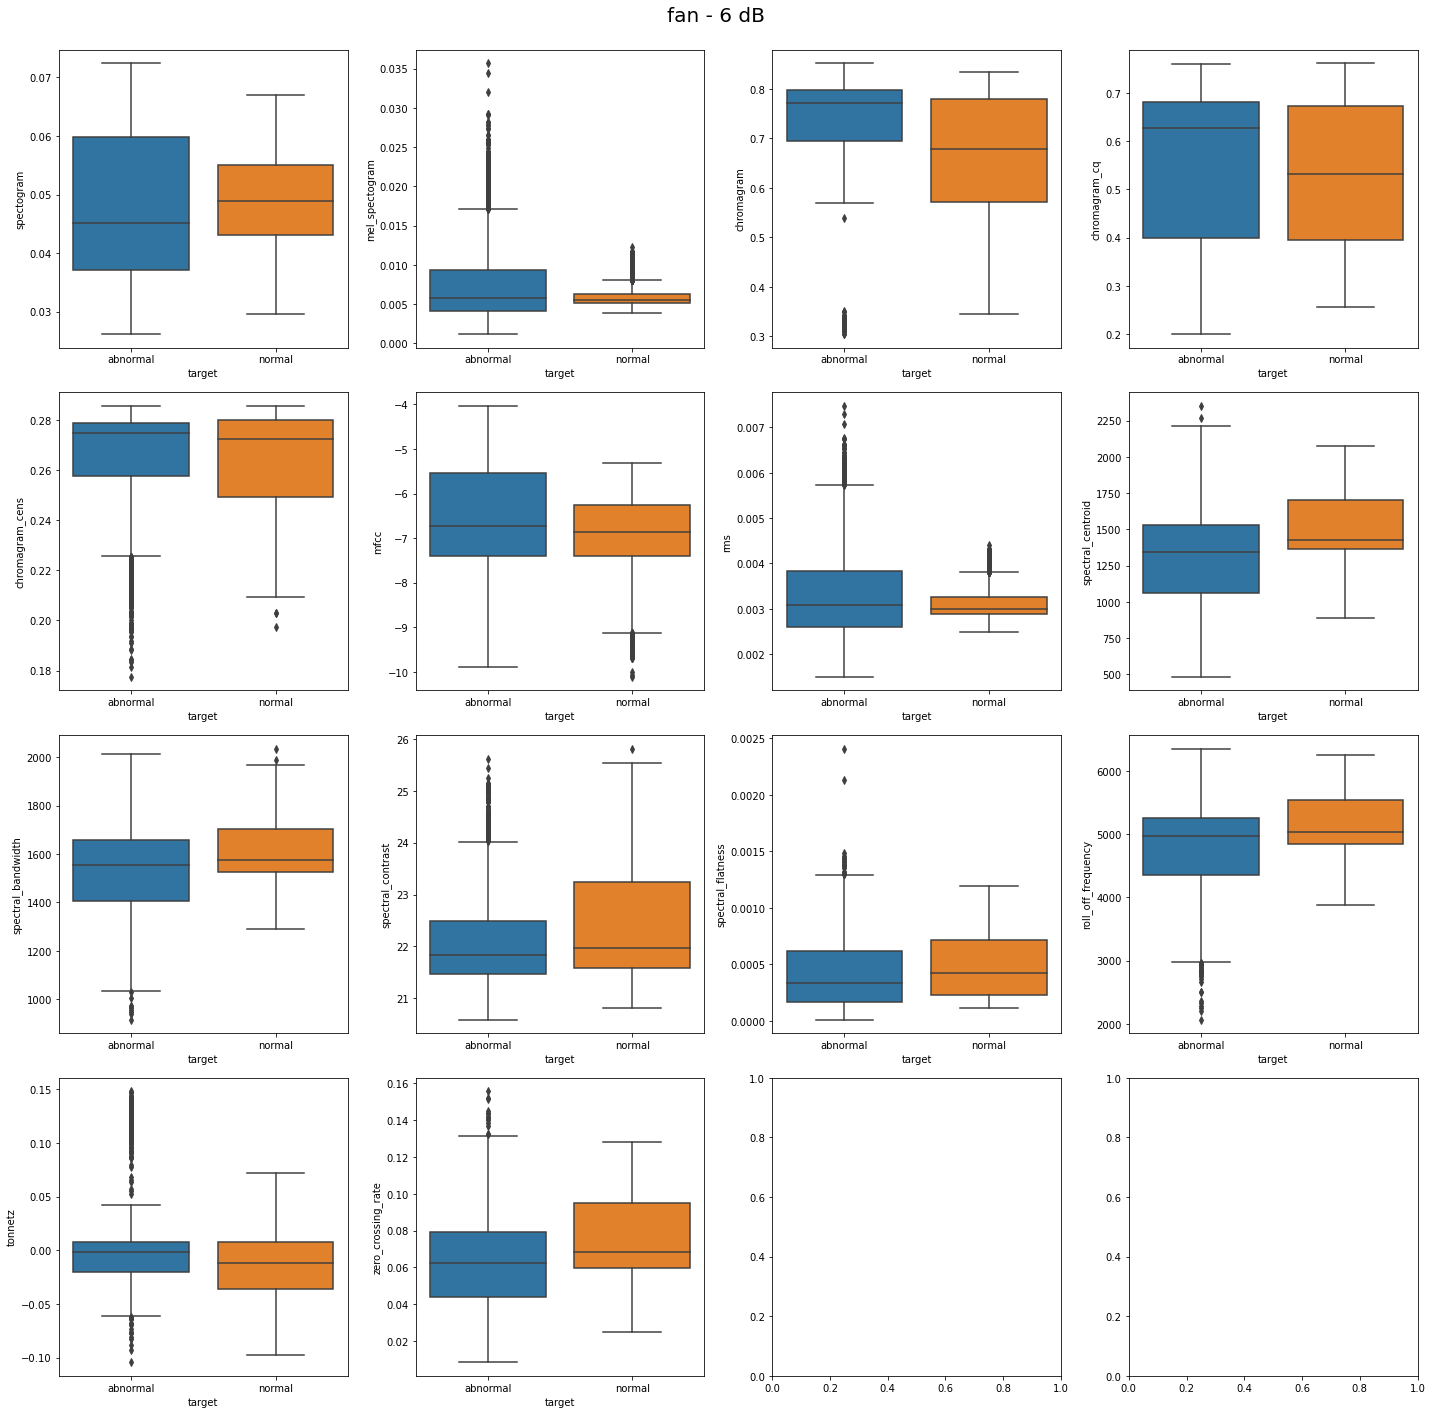

In [133]:
## Variable
machine_type = "fan"
noise = 6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

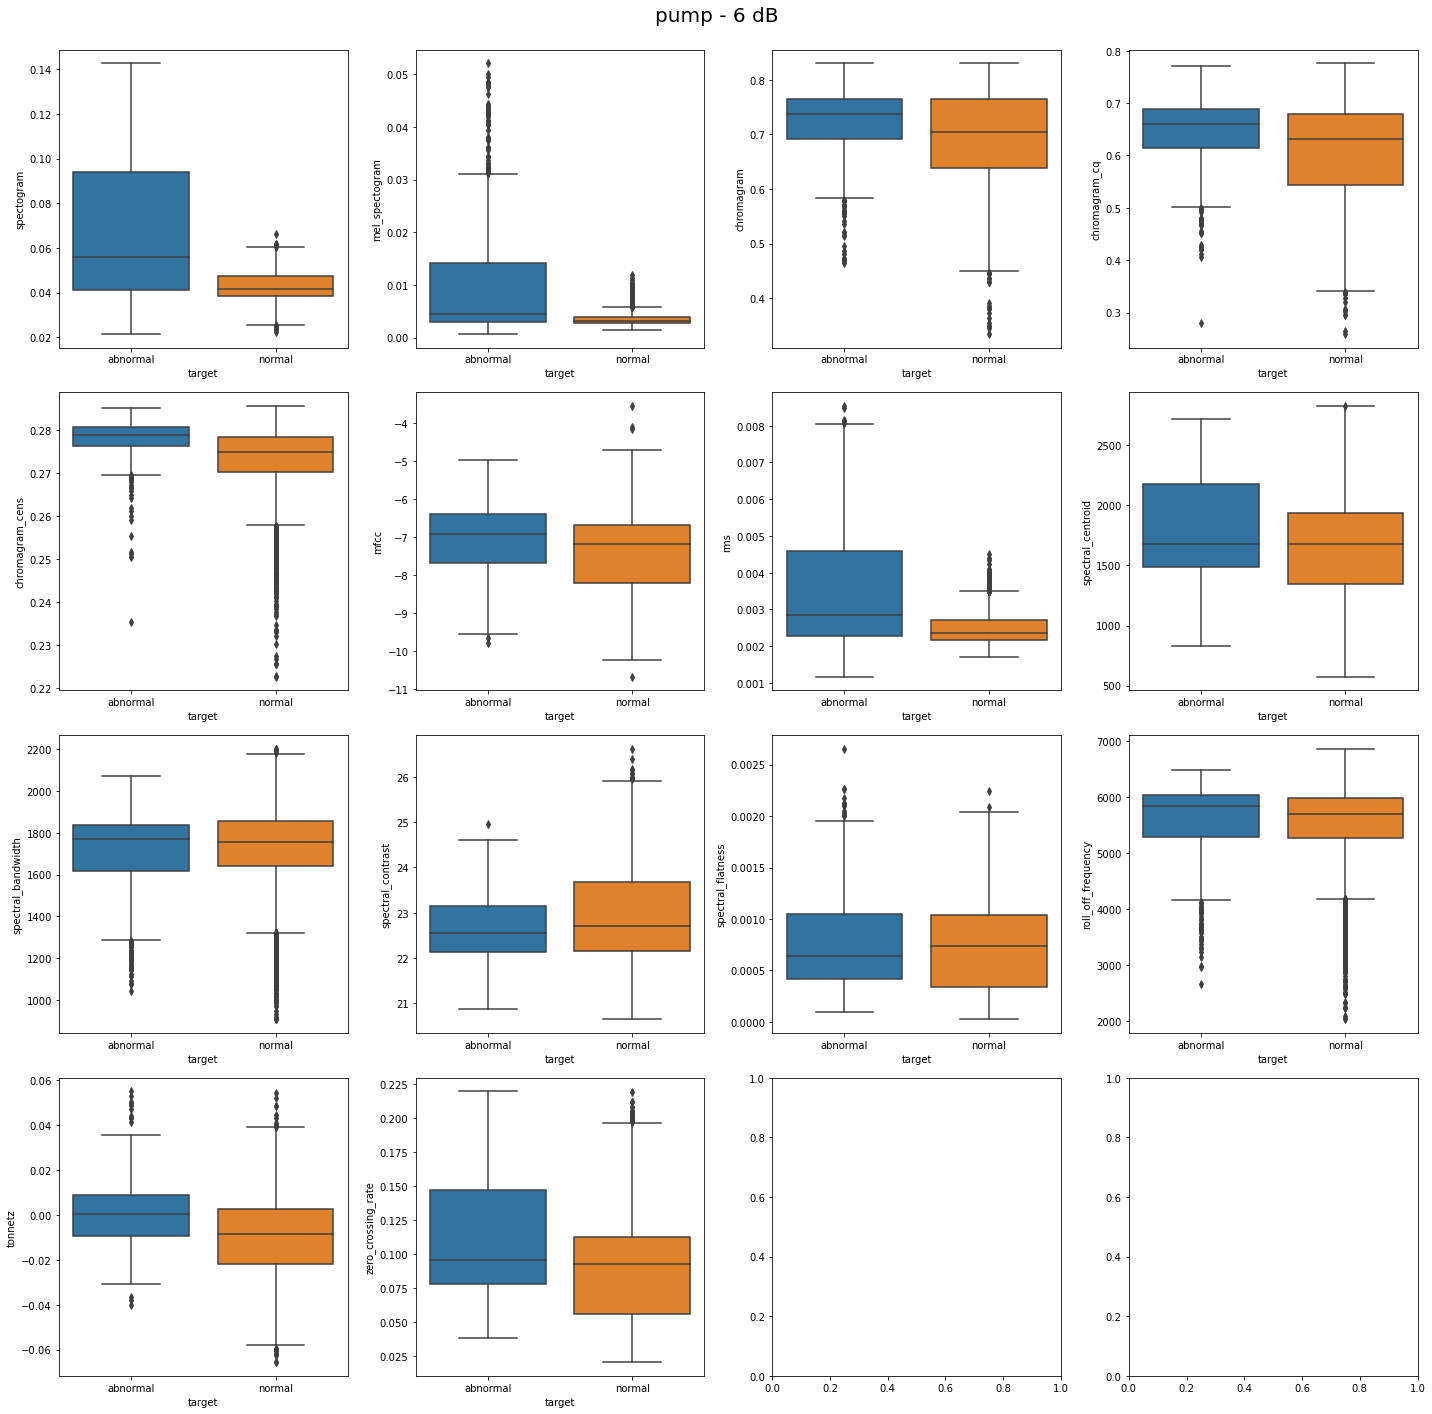

In [134]:
## Variable
machine_type = "pump"
noise = 6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

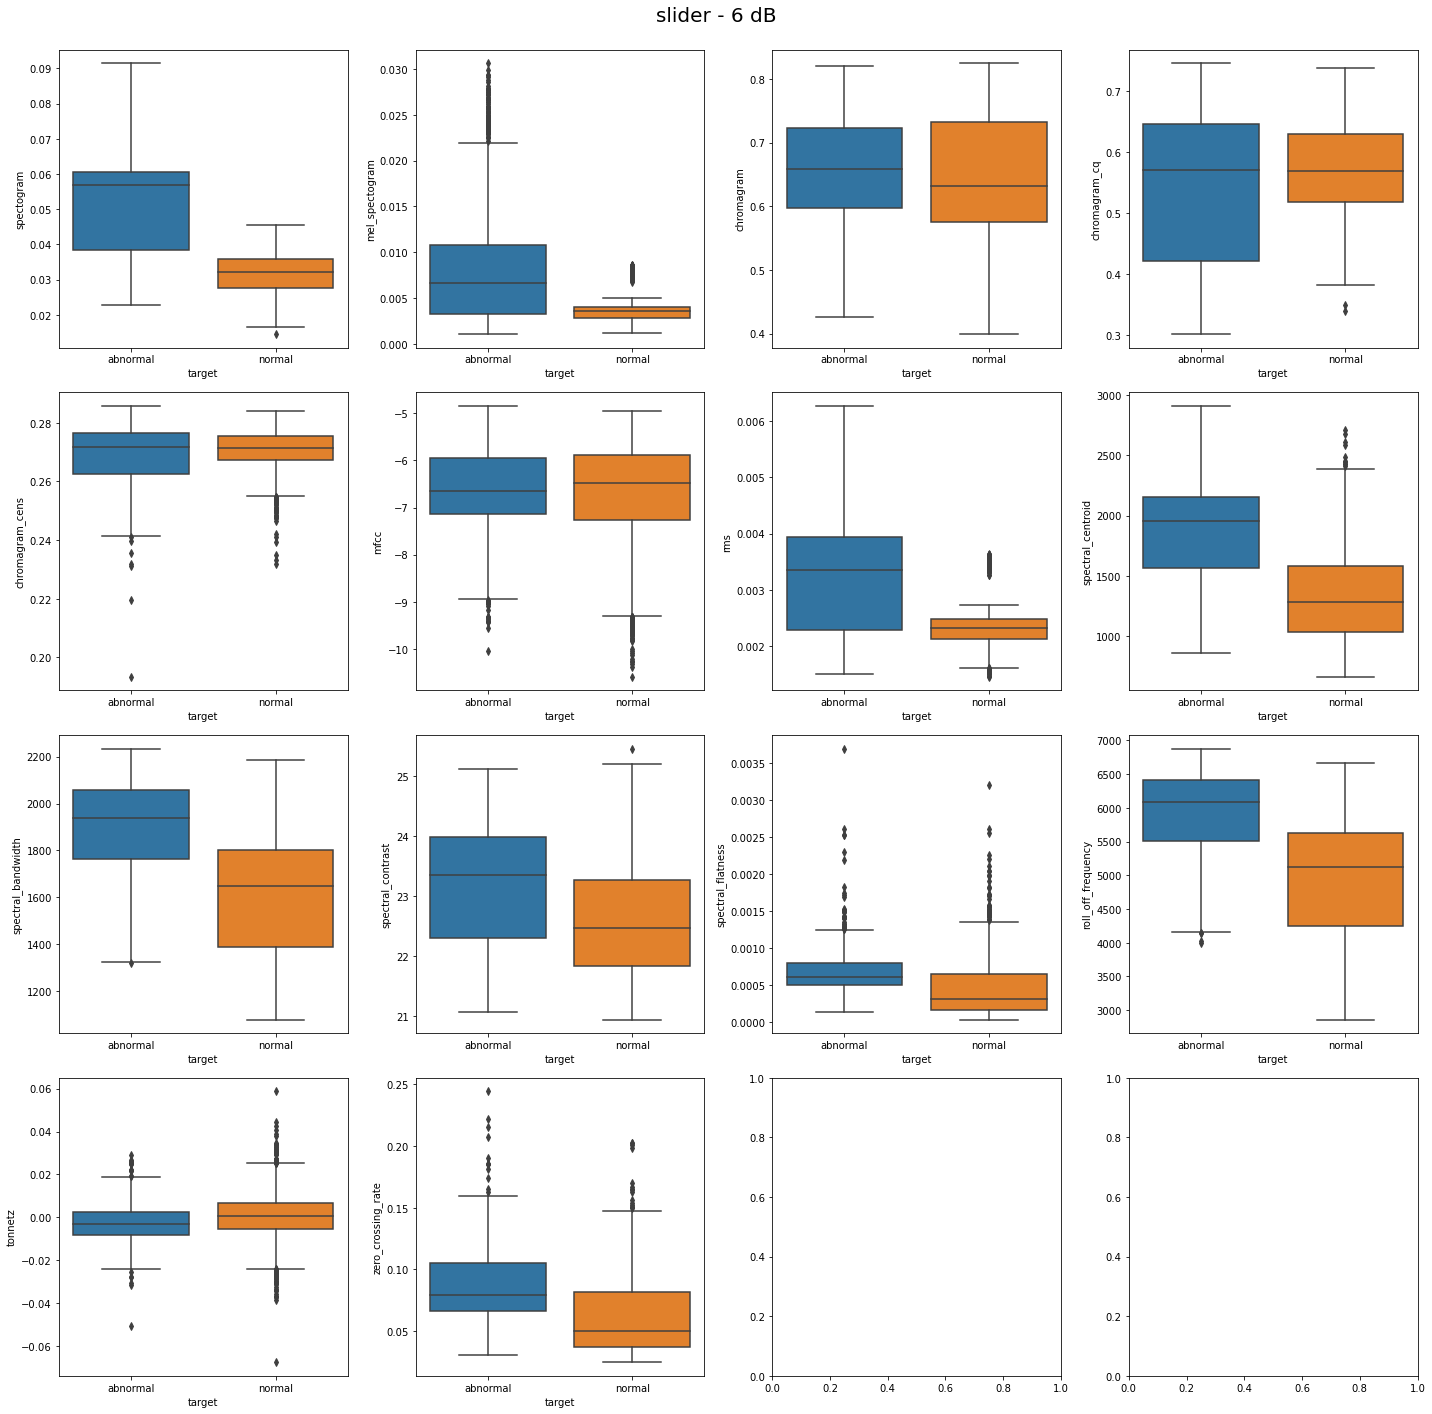

In [135]:
## Variable
machine_type = "slider"
noise = 6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

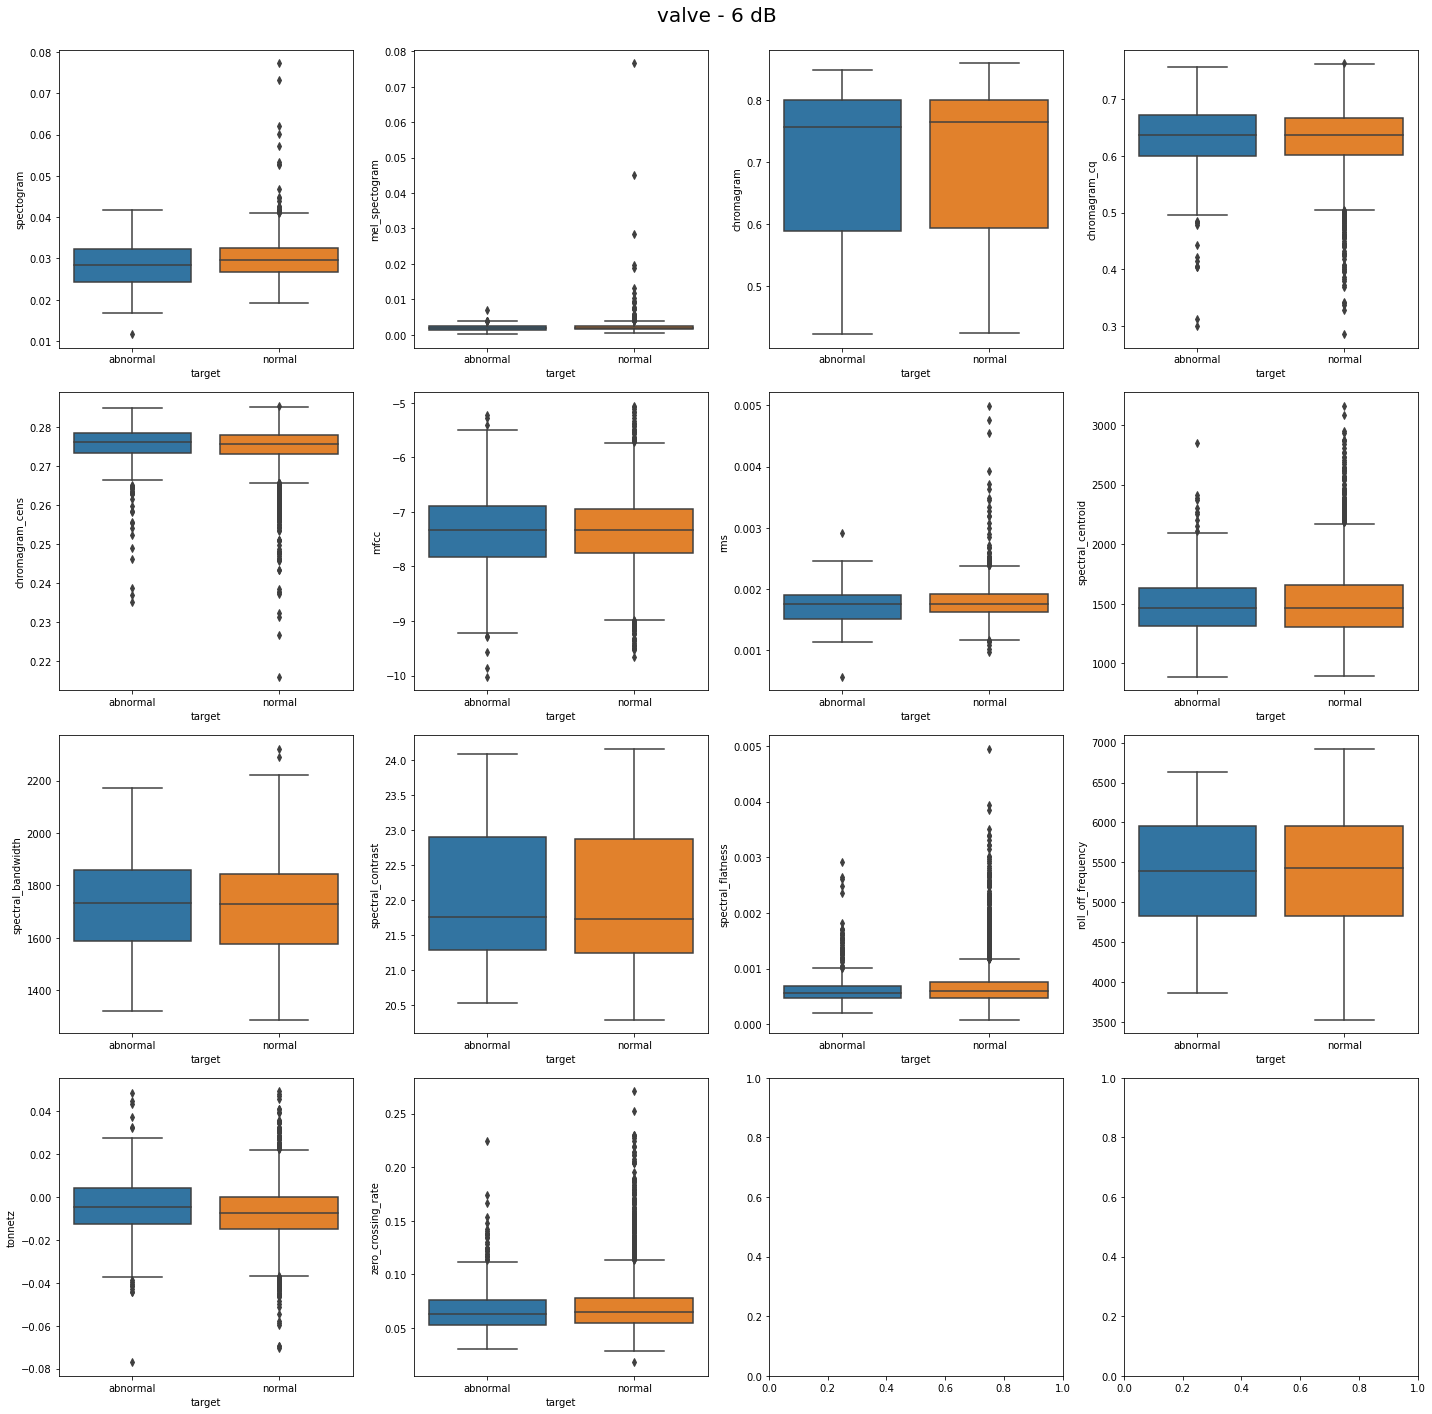

In [136]:
## Variable
machine_type = "valve"
noise = 6

## select only numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns for the scatter plots
cols.remove("noise_db")
cols.remove("model_id")

# Visualising relationships between numerical values and categorical variables (i.e normal and abnormal)
fig, ax = plt.subplots(len(cols)//4 + 1,4, figsize=(20,20))
for i, col in enumerate(cols):
    sns.boxplot(x="target", y=col, data=df.loc[(df.machine_type == machine_type) & (df.noise_db == noise)], ax=ax[i//4,i - 4*(i//4)])

fig.suptitle(f'{machine_type} - {noise} dB', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Feature engineering

In [75]:
# replace abnormal by 1, normal by 0
df.target = df.target.apply(lambda x: 1 if x == "abnormal" else 0)

## Classification
### RandomForestClassifier - all sounds

In [80]:
# Select data
## select numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns
cols.remove("noise_db")
cols.remove("model_id")

# select features and target
X = df[cols]
y = df.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [81]:
# Create classifier and fit it to the training set
# random_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5, criterion = 'entropy')
random_classifier = RandomForestClassifier(n_estimators=100, random_state=5, criterion = 'entropy')
random_classifier.fit(X_train, y_train)

# Compute model score
random_classifier.score(X_test, y_test)

0.9149093599704032

In [82]:
# Evaluate model
print(classification_report(y_test, random_classifier.predict(X_test)))

              precision    recall  f1-score   support

    abnormal       0.96      0.56      0.71      1980
      normal       0.91      0.99      0.95      8832

    accuracy                           0.91     10812
   macro avg       0.93      0.78      0.83     10812
weighted avg       0.92      0.91      0.91     10812



### RandomForestClassifier - for each machine (all noise db levels)

In [96]:
# Select data
## select numeric columns
cols = df.select_dtypes(include="number").columns.tolist()

## drop noise_db and model_id columns
cols.remove("noise_db")
cols.remove("model_id")

In [97]:
for machine_type in df.machine_type.unique():

    # select features and target for each machine type sounds
    X = df[cols].loc[df.machine_type == machine_type]
    y = df.target.loc[df.machine_type == machine_type]
    print(f"******* {machine_type} *******")
    print("X.shape: ", X.shape)
    print("y.shape: ", y.shape)

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

    # Create classifier and fit it to the training set
    # random_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5, criterion = 'entropy')
    random_classifier = RandomForestClassifier(n_estimators=100, random_state=5, criterion = 'entropy')
    random_classifier.fit(X_train, y_train)

    # Compute model score
    print("model score: ", random_classifier.score(X_test, y_test))

    # Evaluate model
    print(classification_report(y_test, random_classifier.predict(X_test)))


******* fan *******
X.shape:  (16650, 14)
y.shape:  (16650,)
model score:  0.9543543543543543
              precision    recall  f1-score   support

    abnormal       0.98      0.85      0.91       885
      normal       0.95      0.99      0.97      2445

    accuracy                           0.95      3330
   macro avg       0.96      0.92      0.94      3330
weighted avg       0.96      0.95      0.95      3330

******* pump *******
X.shape:  (12615, 14)
y.shape:  (12615,)
model score:  0.9456995640110979
              precision    recall  f1-score   support

    abnormal       0.96      0.52      0.68       274
      normal       0.94      1.00      0.97      2249

    accuracy                           0.95      2523
   macro avg       0.95      0.76      0.82      2523
weighted avg       0.95      0.95      0.94      2523

******* slider *******
X.shape:  (12282, 14)
y.shape:  (12282,)
model score:  0.9263329263329263
              precision    recall  f1-score   support

    a

### RandomForestClassifier - for each machine type (for each noise dB)

In [95]:
for machine_type in df.machine_type.unique():
    for noise in df.noise_db.unique():

        # select features and target for each machine type sounds (for each noise db levels)
        X = df[cols].loc[(df.machine_type == machine_type) & (df.noise_db == noise)]
        y = df.target.loc[(df.machine_type == machine_type) & (df.noise_db == noise)]
        print(f"******* {machine_type} - noise_db: {noise} *******")
        print("X.shape: ", X.shape)
        print("y.shape: ", y.shape)

        # Split into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

        # Create classifier and fit it to the training set
        # random_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5, criterion = 'entropy')
        random_classifier = RandomForestClassifier(n_estimators=100, random_state=5, criterion = 'entropy')
        random_classifier.fit(X_train, y_train)

        # Compute model score
        print("model score: ", random_classifier.score(X_test, y_test))

        # Evaluate model
        print(classification_report(y_test, random_classifier.predict(X_test)))



******* fan - noise_db: -6 *******
X.shape:  (5550, 14)
y.shape:  (5550,)
model score:  0.8936936936936937
              precision    recall  f1-score   support

    abnormal       0.92      0.66      0.77       295
      normal       0.89      0.98      0.93       815

    accuracy                           0.89      1110
   macro avg       0.90      0.82      0.85      1110
weighted avg       0.90      0.89      0.89      1110

******* fan - noise_db: 0 *******
X.shape:  (5550, 14)
y.shape:  (5550,)
model score:  0.9702702702702702
              precision    recall  f1-score   support

    abnormal       0.97      0.92      0.94       295
      normal       0.97      0.99      0.98       815

    accuracy                           0.97      1110
   macro avg       0.97      0.95      0.96      1110
weighted avg       0.97      0.97      0.97      1110

******* fan - noise_db: 6 *******
X.shape:  (5550, 14)
y.shape:  (5550,)
model score:  0.9936936936936936
              precision    